In [2]:

import numpy as np
 
# Open the file in binary mode
with open('L1_DHRV.BIN', 'rb') as f:
    # Read the data into a NumPy array
    array = np.fromfile(f, dtype=np.uint8)

In [3]:
len(array)/2*1e-6*4

22.9376

In [6]:
arrSmall = array[5:14]

In [12]:
def getBitsfromBytes(byte):
    bits = np.zeros((len(byte),8))
    for i in range(0, len(byte)):
        temp = byte[i]
        for j in range(0,8):
            bits[i][7-j] = temp%(2)
            temp = temp//2
    return bits

In [15]:
getBitsfromBytes(arrSmall)

array([[1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1.]])

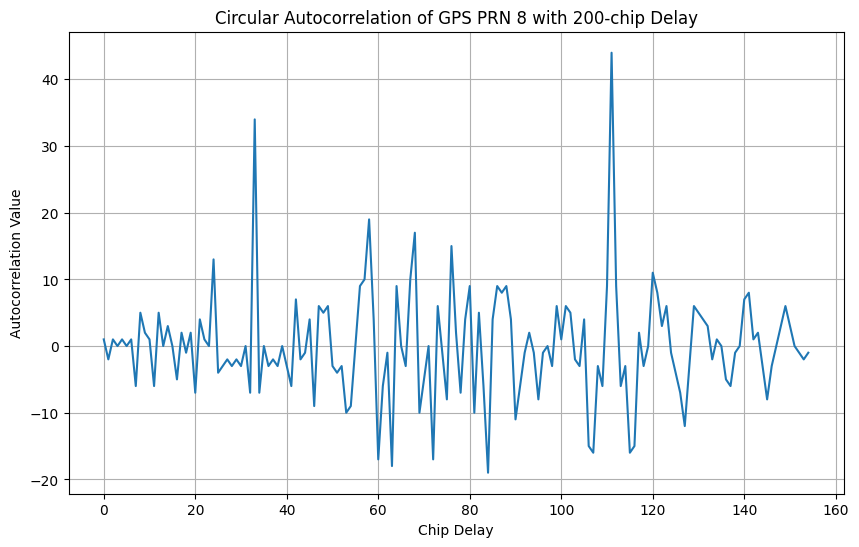

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PRN code for GPS PRN 8 (replace with the actual code)
prn_code = np.array([1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1])

# Delay the PRN code by 200 chips
delay = 200
delayed_prn_code = np.roll(prn_code, delay)

# Compute the circular autocorrelation
circular_autocorrelation = np.correlate(prn_code, delayed_prn_code, mode='full')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(circular_autocorrelation)
plt.title('Circular Autocorrelation of GPS PRN 8 with 200-chip Delay')
plt.xlabel('Chip Delay')
plt.ylabel('Autocorrelation Value')
plt.grid(True)
plt.show()


In [3]:
len(delayed_prn_code)

78

In [12]:
np.correlate(prn_code, delayed_prn_code,mode='same')

array([ -3,   0,  -3,  -6,   7,  -2,  -1,   4,  -9,   6,   5,   6,  -3,
        -4,  -3, -10,  -9,   0,   9,  10,  19,   4, -17,  -6,  -1, -18,
         9,   0,  -3,  10,  17, -10,  -5,   0, -17,   6,  -1,  -8,  15,
         2,  -7,   4,   9, -10,   5,  -6, -19,   4,   9,   8,   9,   4,
       -11,  -6,  -1,   2,  -1,  -8,  -1,   0,  -3,   6,   1,   6,   5,
        -2,  -3,   4, -15, -16,  -3,  -6,   9,  44,   9,  -6,  -3, -16])